<p style="font-size:18px; font-weight:bold;"> 2025 Olivia Debnath</p>
<p style="font-size:14px;">Dana-Farber Cancer Institute & Harvard Medical School</p>

In [1]:
#Following up from PPI_CellxGene_coexpression_H1_analysis_S1_final_17042025.ipynb:
#Now we've a list of PPIs per protein of interest (POI) that fulls H1 co-expression criteria. 
#We want to analyze what %POI & %interactors per POI fulfill this criteria. 

import pandas as pd
import numpy as np
import os

Analyze PPIs prioritized: means PPIs before & retained after H1- testing 

From pre-filtered files (Step-0; basic QC) & H1 post-filtered files (*_Ranked_Priority_Final_13032025.xlsx), we can track:

- How many interactors per POI passed the H1 criteria?
- How many were filtered out (lost) per POI
- Percentage of lost interactors.
- Generate a summary bar plot ranking POIs by retained interactions per POI.


Implementation:

- Extract unique interactors from the original S0 file (before filtering).
- Extract unique interactors from the H1 file (after filtering) using "Contributing_Interactors" and "Prioritized_PPI" columns, ensuring no POI is counted.
- Compare before & after filtering to compute PPI retention/loss.
- Flag cases where >50% of interactors were lost.
- Plot retention percentages with a median retention reference.

In [2]:
#Re-define input directory: 
input_dir = "./results_11032025/Jess_PPI_21032025/PPI_preprocessed_15042025/Level2/filtered_S0/"  

#Dynamically find all relevant input files
input_files = sorted([f for f in os.listdir(input_dir) if f.endswith("_filtered_S0_17042025.csv")]) 
print(input_files) 

#Print total count of files
print(f"\n✅ Total Input Files Found: {len(input_files)}")

['ACSF3_PPI_filtered_S0_17042025.csv', 'ACTB_PPI_filtered_S0_17042025.csv', 'ACY1_PPI_filtered_S0_17042025.csv', 'ADIPOQ_PPI_filtered_S0_17042025.csv', 'AGXT_PPI_filtered_S0_17042025.csv', 'AHCY_PPI_filtered_S0_17042025.csv', 'AIPL1_PPI_filtered_S0_17042025.csv', 'ALAS2_PPI_filtered_S0_17042025.csv', 'ALDOA_PPI_filtered_S0_17042025.csv', 'ALOX5_PPI_filtered_S0_17042025.csv', 'AMPD2_PPI_filtered_S0_17042025.csv', 'ANKRD1_PPI_filtered_S0_17042025.csv', 'ANXA11_PPI_filtered_S0_17042025.csv', 'AP2S1_PPI_filtered_S0_17042025.csv', 'APOA1_PPI_filtered_S0_17042025.csv', 'APOD_PPI_filtered_S0_17042025.csv', 'ASNS_PPI_filtered_S0_17042025.csv', 'ATPAF2_PPI_filtered_S0_17042025.csv', 'BAG3_PPI_filtered_S0_17042025.csv', 'BANF1_PPI_filtered_S0_17042025.csv', 'BCL10_PPI_filtered_S0_17042025.csv', 'BFSP2_PPI_filtered_S0_17042025.csv', 'BLK_PPI_filtered_S0_17042025.csv', 'C1QA_PPI_filtered_S0_17042025.csv', 'C1QB_PPI_filtered_S0_17042025.csv', 'C1QC_PPI_filtered_S0_17042025.csv', 'CA8_PPI_filtered_S

In [3]:
import matplotlib.pyplot as plt

In [4]:
#Define input directories
input_dir_S0 = "./results_11032025/Jess_PPI_21032025/PPI_preprocessed_15042025/Level2/filtered_S0/"
input_dir_H1 = "./results_11032025/Jess_PPI_21032025/PPI_preprocessed_15042025/PPI_contextualization/filtered_Step1_H1/" #H1 PPI ranked files. 

#Find all relevant input files
input_files = sorted([f for f in os.listdir(input_dir_S0) if f.endswith("_filtered_S0_17042025.csv")])

#Initialize storage for tracking losses
ppi_loss_data = []

#Process each POI file 
for file in input_files:
    poi_name = file.split("_")[0]  #Extract POI name from filename

    #Read the original S0 dataset
    s0_path = os.path.join(input_dir_S0, file)
    df_s0 = pd.read_csv(s0_path)

    #Read the corresponding H1 processed file
    h1_filename = file.replace("_PPI_filtered_S0_17042025.csv", "_PPI_filtered_Ranked_Priority_Final_17042025.xlsx")
    h1_path = os.path.join(input_dir_H1, h1_filename)

    if not os.path.exists(h1_path):
        print(f"⚠️ WARNING: No H1 file found for {poi_name}. Skipping...") 
        continue

    df_h1 = pd.read_excel(h1_path)

    #Extract unique interactors before filtering (S0 file)
    interactors_before = set(df_s0["Gene Symbol"].unique()) - {poi_name}  #Remove POI from interactors

    #Extract unique interactors after filtering (H1 file)
    df_h1["Contributing_Interactors"] = df_h1["Contributing_Interactors"].astype(str)  #Ensure string format
    interactors_after = set(df_h1["Contributing_Interactors"].str.split(", ").explode().dropna().unique()) - {poi_name}  #Remove POI

    #Compute interaction loss
    num_interactors_before = len(interactors_before)
    num_interactors_after = len(interactors_after)
    ppi_retained = (num_interactors_after / num_interactors_before) * 100 if num_interactors_before > 0 else 0
    significant_loss = "✅ YES" if ppi_retained < 50 else "✅ NO"

    print(f"{poi_name}: {num_interactors_before} interactors before filtering → {num_interactors_after} retained ({ppi_retained:.2f}% retained)")

    #Store results
    ppi_loss_data.append([poi_name, num_interactors_before, num_interactors_after, ppi_retained, significant_loss])

#Convert results to DataFrame
ppi_loss_df = pd.DataFrame(ppi_loss_data, columns=["POI", "Interactors Before", "Interactors After", "PPI Retained (%)", "Significant Loss (>50%)"])

#Sort by % retained (ascending)
ppi_loss_df = ppi_loss_df.sort_values(by="PPI Retained (%)", ascending=True)
ppi_loss_df.head()

⚠️ WARNING: No H1 file found for ACSF3. Skipping...
ACTB: 2 interactors before filtering → 2 retained (100.00% retained)
⚠️ WARNING: No H1 file found for ACY1. Skipping...
⚠️ WARNING: No H1 file found for ADIPOQ. Skipping...
⚠️ WARNING: No H1 file found for AGXT. Skipping...
⚠️ WARNING: No H1 file found for AHCY. Skipping...
⚠️ WARNING: No H1 file found for AIPL1. Skipping...
⚠️ WARNING: No H1 file found for ALAS2. Skipping...
⚠️ WARNING: No H1 file found for ALDOA. Skipping...
⚠️ WARNING: No H1 file found for ALOX5. Skipping...
⚠️ WARNING: No H1 file found for AMPD2. Skipping...
⚠️ WARNING: No H1 file found for ANKRD1. Skipping...
ANXA11: 1 interactors before filtering → 1 retained (100.00% retained)
⚠️ WARNING: No H1 file found for AP2S1. Skipping...
⚠️ WARNING: No H1 file found for APOA1. Skipping...
APOD: 15 interactors before filtering → 4 retained (26.67% retained)
⚠️ WARNING: No H1 file found for ASNS. Skipping...
⚠️ WARNING: No H1 file found for ATPAF2. Skipping...
BAG3: 20 int

,POI,Interactors Before,Interactors After,PPI Retained (%),Significant Loss (>50%)
4,BFSP2,21,1,4.761905,✅ YES
35,PLN,14,1,7.142857,✅ YES
45,TFG,13,1,7.692308,✅ YES
11,CUL3,12,1,8.333333,✅ YES
47,TPM3,12,1,8.333333,✅ YES


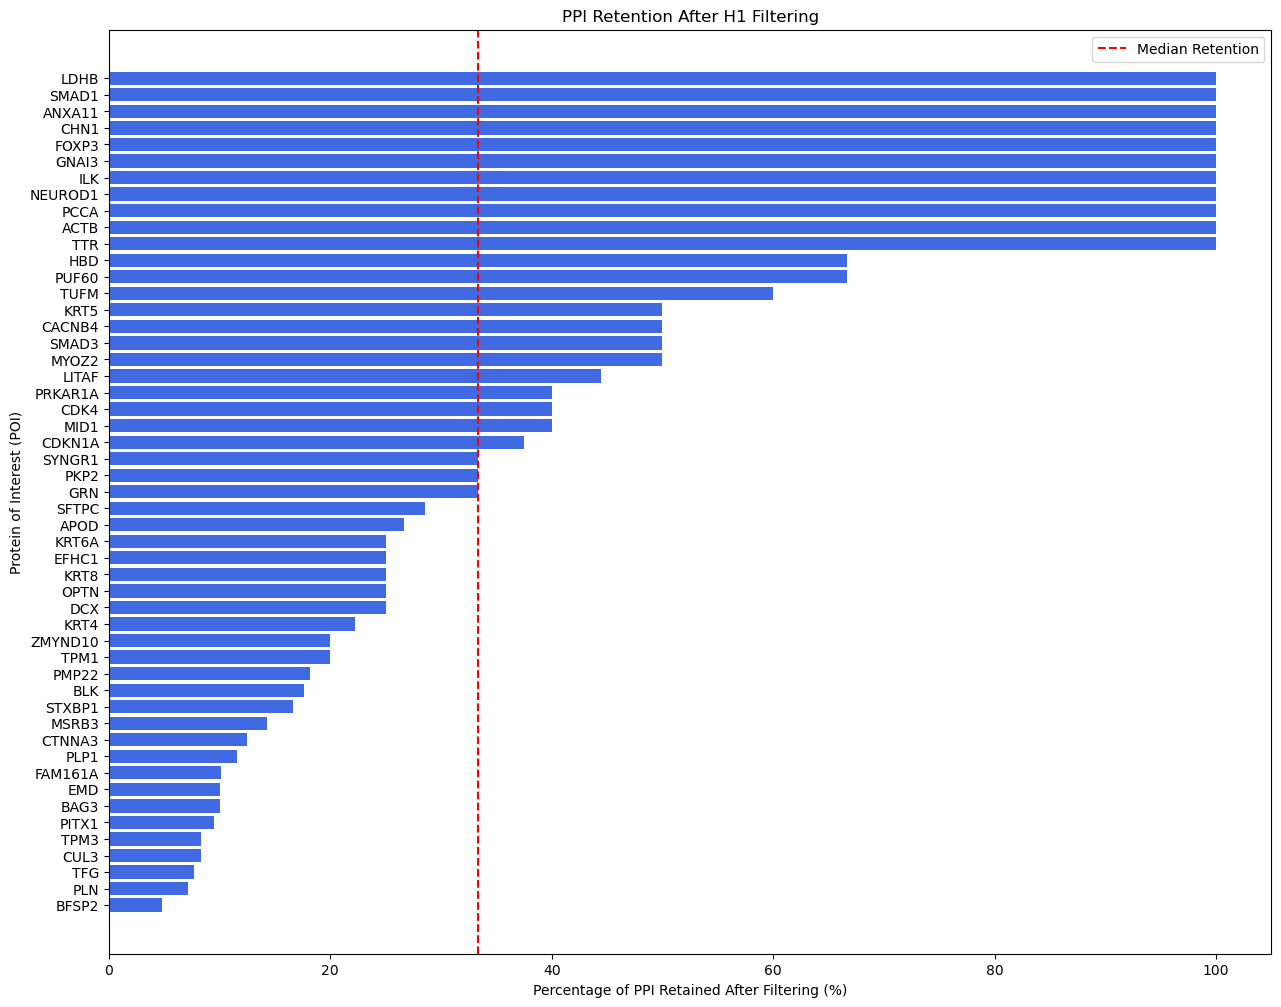

In [5]:
#Plot results
plt.figure(figsize=(15, 12))
plt.barh(ppi_loss_df["POI"], ppi_loss_df["PPI Retained (%)"], color="royalblue")
plt.axvline(ppi_loss_df["PPI Retained (%)"].median(), color="red", linestyle="dashed", label="Median Retention")
plt.xlabel("Percentage of PPI Retained After Filtering (%)")
plt.ylabel("Protein of Interest (POI)")
plt.title("PPI Retention After H1 Filtering")
plt.legend()
plt.show()

Write an Excel file with separate sheets per POI, summarizing:

- Interactors before (S0) & after (S1)
- Number of interactors retained
- % interactors retained
- Significant loss flag (if >50% lost)

In [6]:
#Initialize storage for tracking losses
ppi_loss_data = []
excel_data = {}

In [7]:
#Here, we also printed the interactor names before & after filtering for our reference: 

#Process each POI file
for file in input_files:
    poi_name = file.split("_")[0]  #Extract POI name from filename

    #Read the original S0 dataset
    s0_path = os.path.join(input_dir_S0, file)
    df_s0 = pd.read_csv(s0_path)

    #Read the corresponding H1 processed file
    h1_filename = file.replace("_PPI_filtered_S0_17042025.csv", "_PPI_filtered_Ranked_Priority_Final_17042025.xlsx")
    h1_path = os.path.join(input_dir_H1, h1_filename)

    if not os.path.exists(h1_path):
        print(f"⚠️ WARNING: No H1 file found for {poi_name}. Skipping...")
        continue

    df_h1 = pd.read_excel(h1_path)

    #Extract unique interactors before filtering (S0 file)
    interactors_before = sorted(set(df_s0["Gene Symbol"].unique()) - {poi_name})  #Remove POI from interactors

    #Extract unique interactors after filtering (H1 file)
    df_h1["Contributing_Interactors"] = df_h1["Contributing_Interactors"].astype(str)  #Ensure string format
    interactors_after = sorted(set(df_h1["Contributing_Interactors"].str.split(", ").explode().dropna().unique()) - {poi_name})  #Remove POI

    #Compute interaction loss
    num_interactors_before = len(interactors_before)
    num_interactors_after = len(interactors_after)
    ppi_retained = (num_interactors_after / num_interactors_before) * 100 if num_interactors_before > 0 else 0
    significant_loss = "✅ YES" if ppi_retained < 50 else "⚠️ NO"

    print(f"{poi_name}: {num_interactors_before} interactors before filtering ({', '.join(interactors_before)}) → "
          f"{num_interactors_after} retained ({ppi_retained:.2f}% retained) ({', '.join(interactors_after)})")

    #Store results
    ppi_loss_data.append([poi_name, num_interactors_before, ", ".join(interactors_before),
                          num_interactors_after, ", ".join(interactors_after),
                          ppi_retained, significant_loss])

    #Prepare detailed summary for Excel sheet
    excel_data[f"{poi_name}_summary"] = pd.DataFrame({
        "POI": [poi_name] * max(num_interactors_before, num_interactors_after),
        "Interactors Before": interactors_before + [""] * (max(num_interactors_before, num_interactors_after) - num_interactors_before),
        "Interactors After": interactors_after + [""] * (max(num_interactors_before, num_interactors_after) - num_interactors_after),
        "PPI Retained (%)": [ppi_retained] + [""] * (max(num_interactors_before, num_interactors_after) - 1),
        "Significant Loss (>50%)": [significant_loss] + [""] * (max(num_interactors_before, num_interactors_after) - 1)
    })

#Convert results to DataFrame
ppi_loss_df = pd.DataFrame(ppi_loss_data, columns=["POI", "Interactors Before Count", "Interactors Before",
                                                   "Interactors After Count", "Interactors After",
                                                   "PPI Retained (%)", "Significant Loss (>50%)"])

#Sort by % retained (ascending)
ppi_loss_df = ppi_loss_df.sort_values(by="PPI Retained (%)", ascending=True)

#Save to Excel (Multi-Sheet File)
output_excel_path = "./results_11032025/Jess_PPI_21032025/PPI_preprocessed_15042025/PPI_contextualization/PPI_Loss_Summary_13032025.xlsx"
with pd.ExcelWriter(output_excel_path, engine="xlsxwriter") as writer:
    ppi_loss_df.to_excel(writer, sheet_name="Summary", index=False)
    for sheet_name, df in excel_data.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"✅ Successfully saved PPI loss summary to {output_excel_path}")


⚠️ WARNING: No H1 file found for ACSF3. Skipping...
ACTB: 2 interactors before filtering (ACTG1, CFL2) → 2 retained (100.00% retained) (ACTG1, CFL2)
⚠️ WARNING: No H1 file found for ACY1. Skipping...
⚠️ WARNING: No H1 file found for ADIPOQ. Skipping...
⚠️ WARNING: No H1 file found for AGXT. Skipping...
⚠️ WARNING: No H1 file found for AHCY. Skipping...
⚠️ WARNING: No H1 file found for AIPL1. Skipping...
⚠️ WARNING: No H1 file found for ALAS2. Skipping...
⚠️ WARNING: No H1 file found for ALDOA. Skipping...
⚠️ WARNING: No H1 file found for ALOX5. Skipping...
⚠️ WARNING: No H1 file found for AMPD2. Skipping...
⚠️ WARNING: No H1 file found for ANKRD1. Skipping...
ANXA11: 1 interactors before filtering (FUBP1) → 1 retained (100.00% retained) (FUBP1)
⚠️ WARNING: No H1 file found for AP2S1. Skipping...
⚠️ WARNING: No H1 file found for APOA1. Skipping...
APOD: 15 interactors before filtering (AQP9, BIK, CD53, CPLX4, CREB3L1, ERGIC3, FAM209A, GDAP1, GJA8, KCNJ6, MFF, MTERF2, MTIF3, TMEM237, VAP

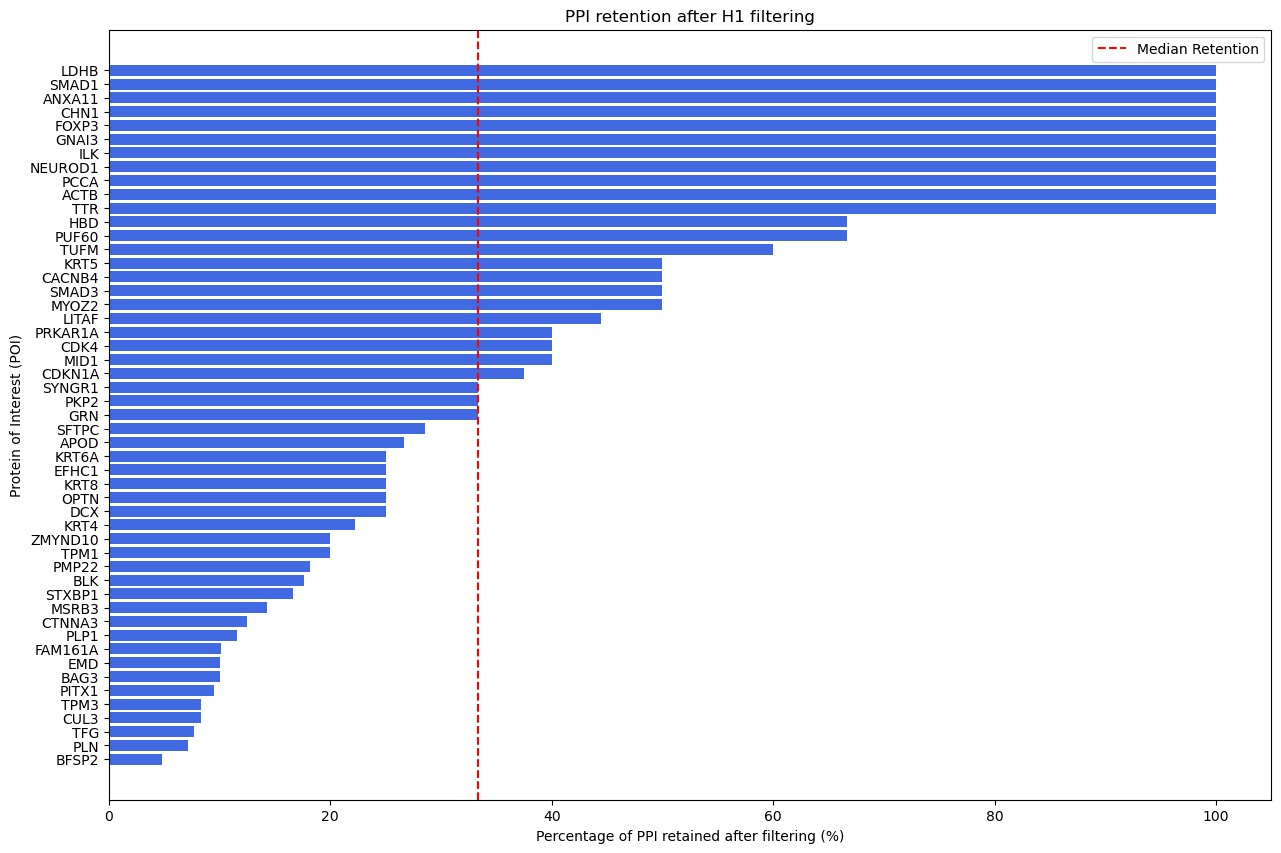

'./results_11032025/Jess_PPI_21032025/PPI_preprocessed_15042025/PPI_contextualization/PPI_Retention_BarPlot_17042025.pdf'

In [8]:
#Define the output path for the figure
figure_output_path = "./results_11032025/Jess_PPI_21032025/PPI_preprocessed_15042025/PPI_contextualization/PPI_Retention_BarPlot_17042025.pdf"

#Plot results & save the figure
plt.figure(figsize=(15, 10))
plt.barh(ppi_loss_df["POI"], ppi_loss_df["PPI Retained (%)"], color="royalblue")
plt.axvline(ppi_loss_df["PPI Retained (%)"].median(), color="red", linestyle="dashed", label="Median Retention")
plt.xlabel("Percentage of PPI retained after filtering (%)")
plt.ylabel("Protein of Interest (POI)")
plt.title("PPI retention after H1 filtering")
plt.legend()
plt.savefig(figure_output_path, dpi=300, bbox_inches="tight")
plt.show()

#Return figure path
figure_output_path